In [1]:
library(forecast)
library(urca)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
births <- scan("http://robjhyndman.com/tsdldata/data/nybirths.dat")
births

[1] 26.663 23.598 26.931 24.740 25.806 24.364 24.477 23.901 23.175 23.227
 [11] 21.672 21.870 21.439 21.089 23.709 21.669 21.752 20.761 23.479 23.824
 [21] 23.105 23.110 21.759 22.073 21.937 20.035 23.590 21.672 22.222 22.123
 [31] 23.950 23.504 22.238 23.142 21.059 21.573 21.548 20.000 22.424 20.615
 [41] 21.761 22.874 24.104 23.748 23.262 22.907 21.519 22.025 22.604 20.894
 [51] 24.677 23.673 25.320 23.583 24.671 24.454 24.122 24.252 22.084 22.991
 [61] 23.287 23.049 25.076 24.037 24.430 24.667 26.451 25.618 25.014 25.110
 [71] 22.964 23.981 23.798 22.270 24.775 22.646 23.988 24.737 26.276 25.816
 [81] 25.210 25.199 23.162 24.707 24.364 22.644 25.565 24.062 25.431 24.635
 [91] 27.009 26.606 26.268 26.462 25.246 25.180 24.657 23.304 26.982 26.199
[101] 27.210 26.122 26.706 26.878 26.152 26.379 24.712 25.688 24.990 24.239
[111] 26.721 23.475 24.767 26.219 28.361 28.599 27.914 27.784 25.693 26.881
[121] 26.217 24.218 27.914 26.975 28.527 27.139 28.982 28.169 28.056 29.136
[131] 26.291 26.987 26.589 24.848 27.543 26.896 28.878 27.390 28.065 28.141
[141] 29.048 28.484 26.634 27.735 27.132 24.924 28.963 26.589 27.931 28.009
[151] 29.229 28.759 28.405 27.945 25.912 26.619 26.076 25.286 27.660 25.951
[161] 26.398 25.565 28.865 30.000 29.261 29.012 26.992 27.897

In [3]:
ts_births<-ts(births, start=c(1946,1), frequency = 12)
ts_births

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,26.663,23.598,26.931,24.740,25.806,24.364,24.477,23.901,23.175,23.227,21.672,21.870
1947,21.439,21.089,23.709,21.669,21.752,20.761,23.479,23.824,23.105,23.110,21.759,22.073
1948,21.937,20.035,23.590,21.672,22.222,22.123,23.950,23.504,22.238,23.142,21.059,21.573
1949,21.548,20.000,22.424,20.615,21.761,22.874,24.104,23.748,23.262,22.907,21.519,22.025
1950,22.604,20.894,24.677,23.673,25.320,23.583,24.671,24.454,24.122,24.252,22.084,22.991
1951,23.287,23.049,25.076,24.037,24.430,24.667,26.451,25.618,25.014,25.110,22.964,23.981
1952,23.798,22.270,24.775,22.646,23.988,24.737,26.276,25.816,25.210,25.199,23.162,24.707
1953,24.364,22.644,25.565,24.062,25.431,24.635,27.009,26.606,26.268,26.462,25.246,25.180
1954,24.657,23.304,26.982,26.199,27.210,26.122,26.706,26.878,26.152,26.379,24.712,25.688
1955,24.990,24.239,26.721,23.475,24.767,26.219,28.361,28.599,27.914,27.784,25.693,26.881


In [4]:
# 분기별 데이터로 변환
quarter_births<-aggregate(ts_births, nfrequency = 4, FUN = sum)
quarter_births

,Qtr1,Qtr2,Qtr3,Qtr4
1946,77.192,74.910,71.553,66.769
1947,66.237,64.182,70.408,66.942
1948,65.562,66.017,69.692,65.774
1949,63.972,65.250,71.114,66.451
1950,68.175,72.576,73.247,69.327
1951,71.412,73.134,77.083,72.055
1952,70.843,71.371,77.302,73.068
1953,72.573,74.128,79.883,76.888
1954,74.943,79.531,79.736,76.779
1955,75.950,74.461,84.874,80.358


In [6]:
# split train, test data
train<-window(quarter_births, end=c(1957,2))
test<-window(quarter_births, start=c(1957,3), end=c(1959,4))
train
test

,Qtr1,Qtr2,Qtr3,Qtr4
1946,77.192,74.910,71.553,66.769
1947,66.237,64.182,70.408,66.942
1948,65.562,66.017,69.692,65.774
1949,63.972,65.250,71.114,66.451
1950,68.175,72.576,73.247,69.327
1951,71.412,73.134,77.083,72.055
1952,70.843,71.371,77.302,73.068
1953,72.573,74.128,79.883,76.888
1954,74.943,79.531,79.736,76.779
1955,75.950,74.461,84.874,80.358


,Qtr1,Qtr2,Qtr3,Qtr4
1957,,,85.254,82.853
1958,81.019,82.529,86.393,80.476
1959,79.022,77.914,88.126,83.901



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.0107 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


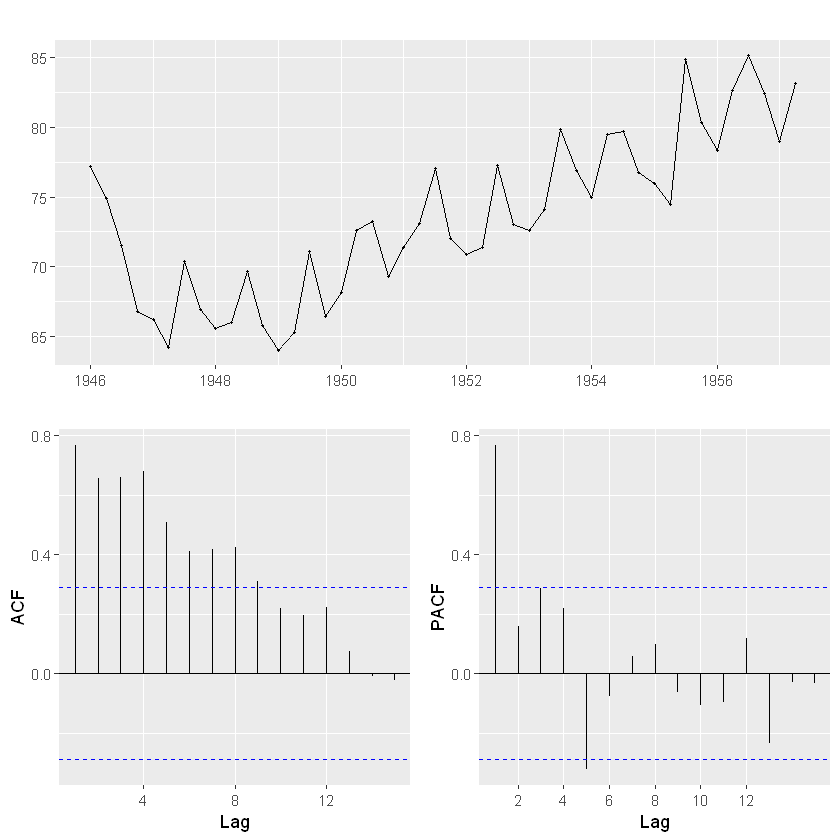

In [7]:
# train 데이터 정상성 검정
ggtsdisplay(train)
summary(ur.kpss(train))
# 검정통계량값이 1pct의 임계치보다 크므로 귀무가설(정상시계열이다) 기각! 즉, 해당 데이터는 비정상시계열!
# ACF, PACF함수 모양을 보니 차분 1번을 해야 하는 그래프이다!

In [9]:
# 권장하는 차분횟수 출력
ndiffs(train)

[1] 1


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.3612 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


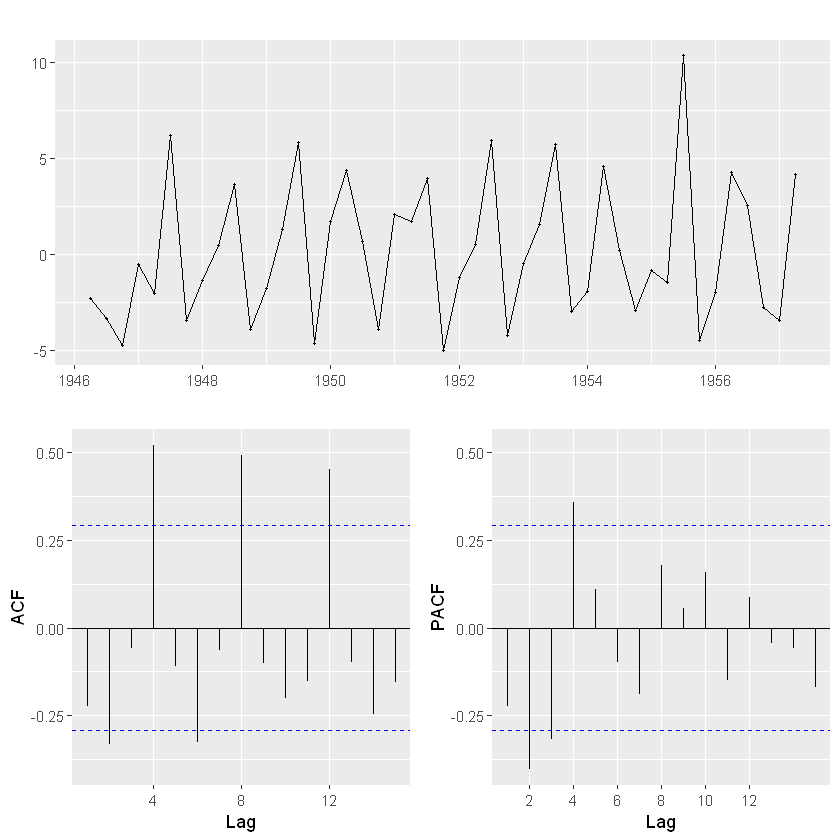

In [10]:
# 차분1번 시행한 후 KPSS검정과 ACF, PACF 그래프 살펴보기
ggtsdisplay(diff(train))
summary(ur.kpss(diff(train)))

In [11]:
# 1번 차분함으로써 정상성 데이터 얻음
# ACF함수에서 막대기 3개가 팍 튐! => MA(1) or MA(2) or MA(3)
# PACF함수에서 막대기가 1~2개 팍튐! => AR(1) or AR(2)

## 모델후보

1. ARIMA(1,1,1)
2. ARIMA(1,1,2)
3. ARIMA(1,1,3)
4. ARIMA(2,1,1)
5. ARIMA(2,1,2)
6. ARIMA(2,1,3)
7. auto.arima

In [12]:
# 7개 모델 적합시키기
arima111<-Arima(train, order=c(1,1,1))
arima112<-Arima(train, order=c(1,1,2))
arima113<-Arima(train, order=c(1,1,3))
arima211<-Arima(train, order=c(2,1,1))
arima212<-Arima(train, order=c(2,1,2))
arima213<-Arima(train, order=c(2,1,3))
auto_arima<-auto.arima(train)

arima111 # 차수가 가장적으면서 AICc값 가장 낮음!
arima112
arima113

Series: train 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.1824  -0.6280
s.e.  0.2278   0.1662

sigma^2 estimated as 11.74:  log likelihood=-118.39
AIC=242.78   AICc=243.37   BIC=248.2

Series: train 
ARIMA(1,1,2) 

Coefficients:
          ar1      ma1      ma2
      -0.1444  -0.2410  -0.2443
s.e.   0.3628   0.3317   0.1705

sigma^2 estimated as 11.72:  log likelihood=-117.83
AIC=243.67   AICc=244.67   BIC=250.9

Series: train 
ARIMA(1,1,3) 

Coefficients:
         ar1      ma1     ma2     ma3
      0.8002  -1.3173  0.1782  0.3531
s.e.  0.1662   0.1966  0.2285  0.1354

sigma^2 estimated as 10.65:  log likelihood=-115.92
AIC=241.83   AICc=243.37   BIC=250.86

In [14]:
arima211
arima212
arima213
#auto_arima # SARIMA는 제외해주자!

Series: train 
ARIMA(2,1,1) 

Coefficients:
          ar1      ar2      ma1
      -0.0790  -0.3962  -0.3197
s.e.   0.2109   0.1499   0.2016

sigma^2 estimated as 10.71:  log likelihood=-115.95
AIC=239.9   AICc=240.9   BIC=247.13

Series: train 
ARIMA(2,1,2) 

Coefficients:
         ar1      ar2      ma1     ma2
      0.0451  -0.9655  -0.2944  0.9999
s.e.  0.0394   0.0350   0.0841  0.1182

sigma^2 estimated as 7.085:  log likelihood=-108.87
AIC=227.75   AICc=229.28   BIC=236.78

Series: train 
ARIMA(2,1,3) 

Coefficients:
         ar1      ar2      ma1     ma2      ma3
      0.0493  -0.9808  -0.4489  1.0503  -0.2155
s.e.  0.0337   0.0252   0.1425  0.1132   0.1570

sigma^2 estimated as 6.951:  log likelihood=-107.93
AIC=227.86   AICc=230.07   BIC=238.7

In [15]:
# 위 여러가지 모델들의 요약값으로 보아 ARIMA(2,1,2) 와 ARIMA(2,1,3) 2파전으로 비교해보자
# 우선은 ARIMA(2,1,2)모델이 차수도 더 적으면서 AICc값이 더 낮음

# 적합된 데이터들과 원 데이터들간의 RMSE값도 비교해보기
summary(arima212)
summary(arima213)

# RMSE값은 ARIMA(2,1,3)모델이 더 적게 나타남..!

Series: train 
ARIMA(2,1,2) 

Coefficients:
         ar1      ar2      ma1     ma2
      0.0451  -0.9655  -0.2944  0.9999
s.e.  0.0394   0.0350   0.0841  0.1182

sigma^2 estimated as 7.085:  log likelihood=-108.87
AIC=227.75   AICc=229.28   BIC=236.78

Training set error measures:
                    ME     RMSE      MAE       MPE    MAPE      MASE       ACF1
Training set 0.1560323 2.512888 1.900782 0.1111469 2.61418 0.7247977 -0.2094847
Series: train 
ARIMA(2,1,3) 

Coefficients:
         ar1      ar2      ma1     ma2      ma3
      0.0493  -0.9808  -0.4489  1.0503  -0.2155
s.e.  0.0337   0.0252   0.1425  0.1132   0.1570

sigma^2 estimated as 6.951:  log likelihood=-107.93
AIC=227.86   AICc=230.07   BIC=238.7

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.1914713 2.458469 1.871488 0.1490633 2.581668 0.7136273
                    ACF1
Training set -0.04104724



	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)
Q* = 13.79, df = 4, p-value = 0.007997

Model df: 4.   Total lags used: 8



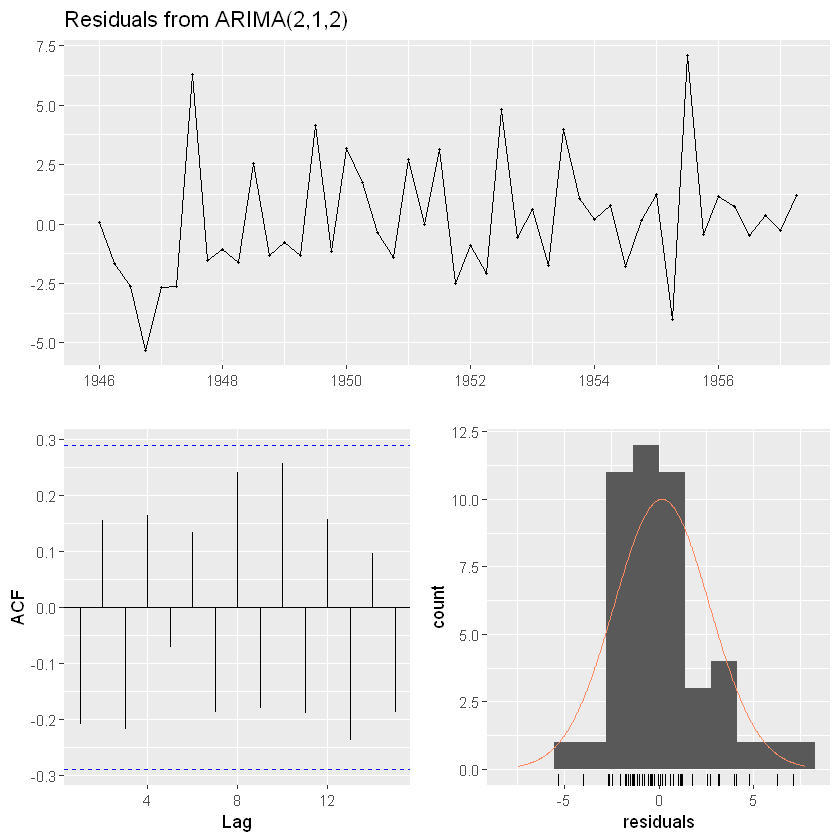


	Ljung-Box test

data:  Residuals from ARIMA(2,1,3)
Q* = 6.9168, df = 3, p-value = 0.0746

Model df: 5.   Total lags used: 8



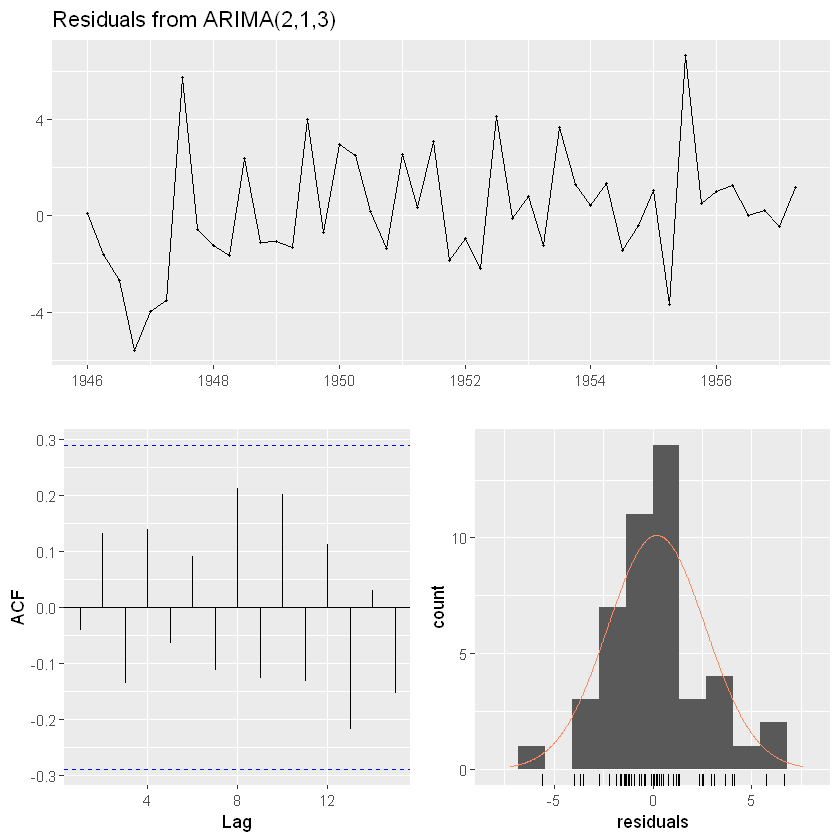

In [16]:
# 잔차검정
checkresiduals(arima212)
checkresiduals(arima213)

# 둘이 비슷함 => 대소비교 불가...

In [17]:
# 그렇다면 이제 예측값과 실제값의 RMSE값을 비교해보면서 최종 선정모델을 채택하자
for_arima212<-forecast(arima212, h=10)
for_arima213<-forecast(arima213, h=10)
accuracy(for_arima212, test)
accuracy(for_arima213, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1560323,2.512888,1.900782,0.1111469,2.614180,0.7247977,-0.2094847,NA
Test set,-0.7295642,2.071070,1.493424,-0.9542686,1.837561,0.5694658,-0.1719085,0.4780443


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.1914713,2.458469,1.871488,0.1490633,2.581668,0.7136273,-0.04104724,NA
Test set,-0.4603586,1.966729,1.405476,-0.6276517,1.724984,0.5359299,-0.17964426,0.4569025


In [19]:
for_snaive<-snaive(train, h=10)
accuracy(for_snaive, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.9366905,3.714975,2.6225,1.08777986,3.601236,1.0000000,0.4174325,NA
Test set,0.0336000,2.195771,1.5982,-0.03035434,1.952805,0.6094185,-0.3044958,0.5130643


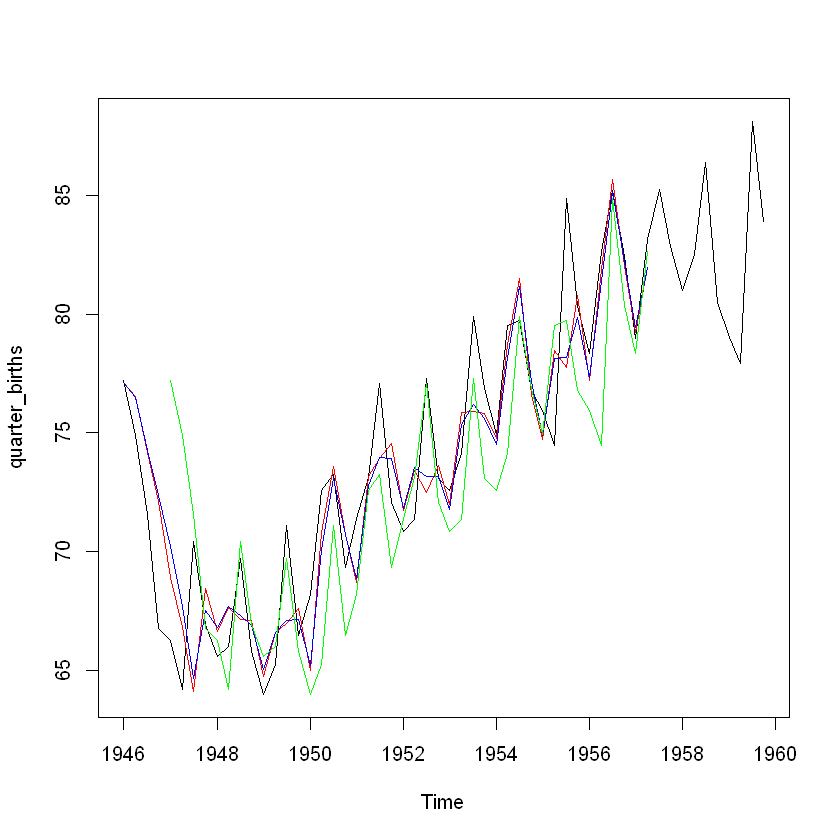

In [25]:
plot(quarter_births)
lines(for_arima212$fitted, col='red')
lines(for_arima213$fitted, col='blue')
lines(for_snaive$fitted, col='green')

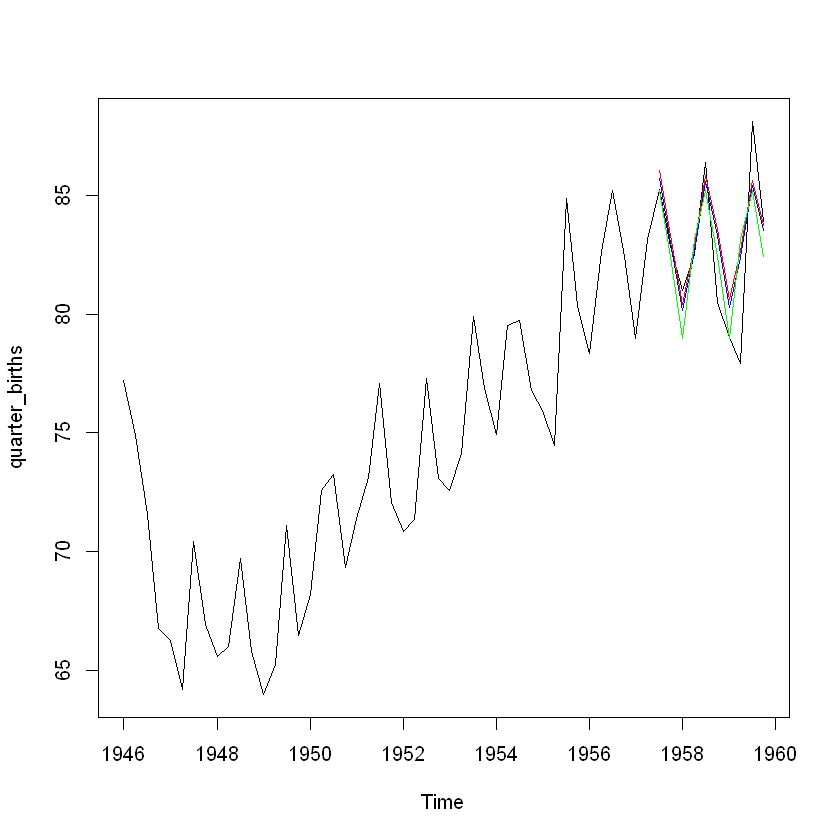

In [26]:
plot(quarter_births)
lines(for_arima212$mean, col='red')
lines(for_arima213$mean, col='blue')
lines(for_snaive$mean, col='green')

# naive, meanf 방법과 비교해보기!